In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../../')

In [3]:
from common.utils.image_preprocess import (
    get_slide_filename_from_image_id, read_slide, read_slide_partitions
)

In [4]:
import os
from openslide import open_slide
import matplotlib.pyplot as plt
import math

In [5]:
IMAGE_SOURCE_DIR = '../../../data/source_data/'
SAMPLE_IMG_ID = '091'

In [6]:
img_filepath = os.path.join(IMAGE_SOURCE_DIR,
                            get_slide_filename_from_image_id(SAMPLE_IMG_ID))

In [7]:
slide = open_slide(img_filepath)

In [8]:
slide.level_dimensions

((61440, 53760),
 (30720, 26880),
 (15360, 13440),
 (7680, 6720),
 (3840, 3360),
 (1920, 1680),
 (960, 840),
 (480, 420))

In [9]:
slide.level_downsamples

(1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0)

In [10]:
# def read_slide_partitions(slide,
#                           level,
#                           partition_width=256,
#                           partition_height=256,
#                           include_padding=False,
#                           show_plot=False):
#     slide_height, slide_width = slide.level_dimensions[level]
#     downsample_factor = int(slide.level_downsamples[level])
    
#     if include_padding:
#         n_cols = math.ceil(slide_height / partition_height)
#         n_rows = math.ceil(slide_width / partition_width)
#     else:
#         n_cols = slide_height // partition_height
#         n_rows = slide_width // partition_width
    
#     partitions = []
    
#     for i in range(n_rows):
#         for j in range(n_cols):
#             x = j * partition_width * downsample_factor
#             y = i * partition_height * downsample_factor
            
#             partition_image = read_slide(slide,
#                                      x=x,
#                                      y=y,
#                                      level=level,
#                                      width=partition_width,
#                                      height=partition_height)
#             partitions.append(partition_image)
    
#     if show_plot:
#         fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))
#         for idx in range(len(partitions)):
#             i = idx // n_cols
#             j = idx % n_cols
#             axes[i, j].imshow(partitions[idx])
#         plt.tight_layout()
#         plt.show()
    
#     return partitions

In [11]:
slide_image = read_slide(slide, 
                         x=0, 
                         y=0, 
                         level=5, 
                         width=slide.level_dimensions[5][0], 
                         height=slide.level_dimensions[5][1])


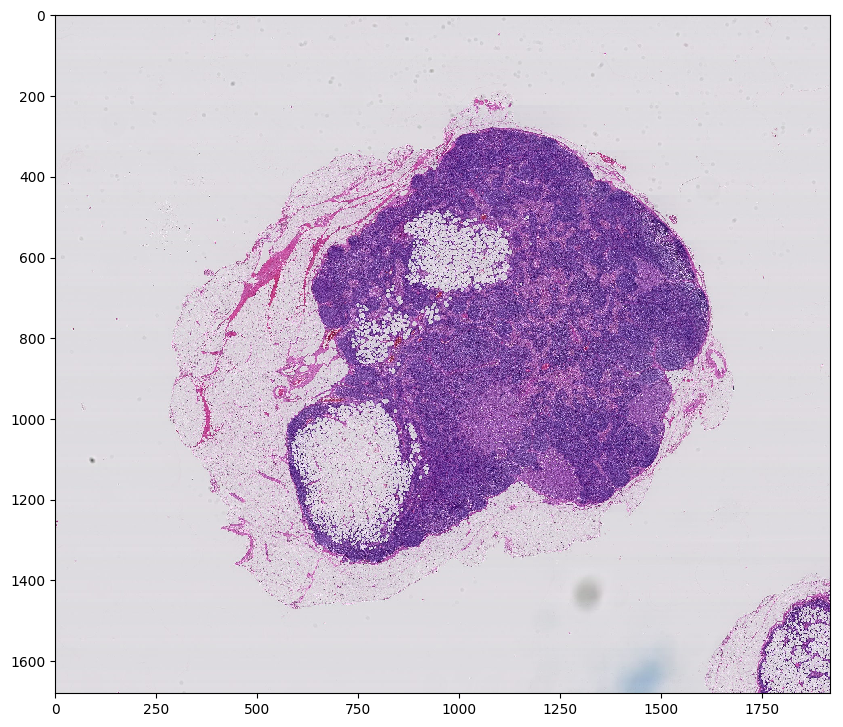

In [12]:
plt.figure(figsize=(10,10), dpi=100)
plt.imshow(slide_image)

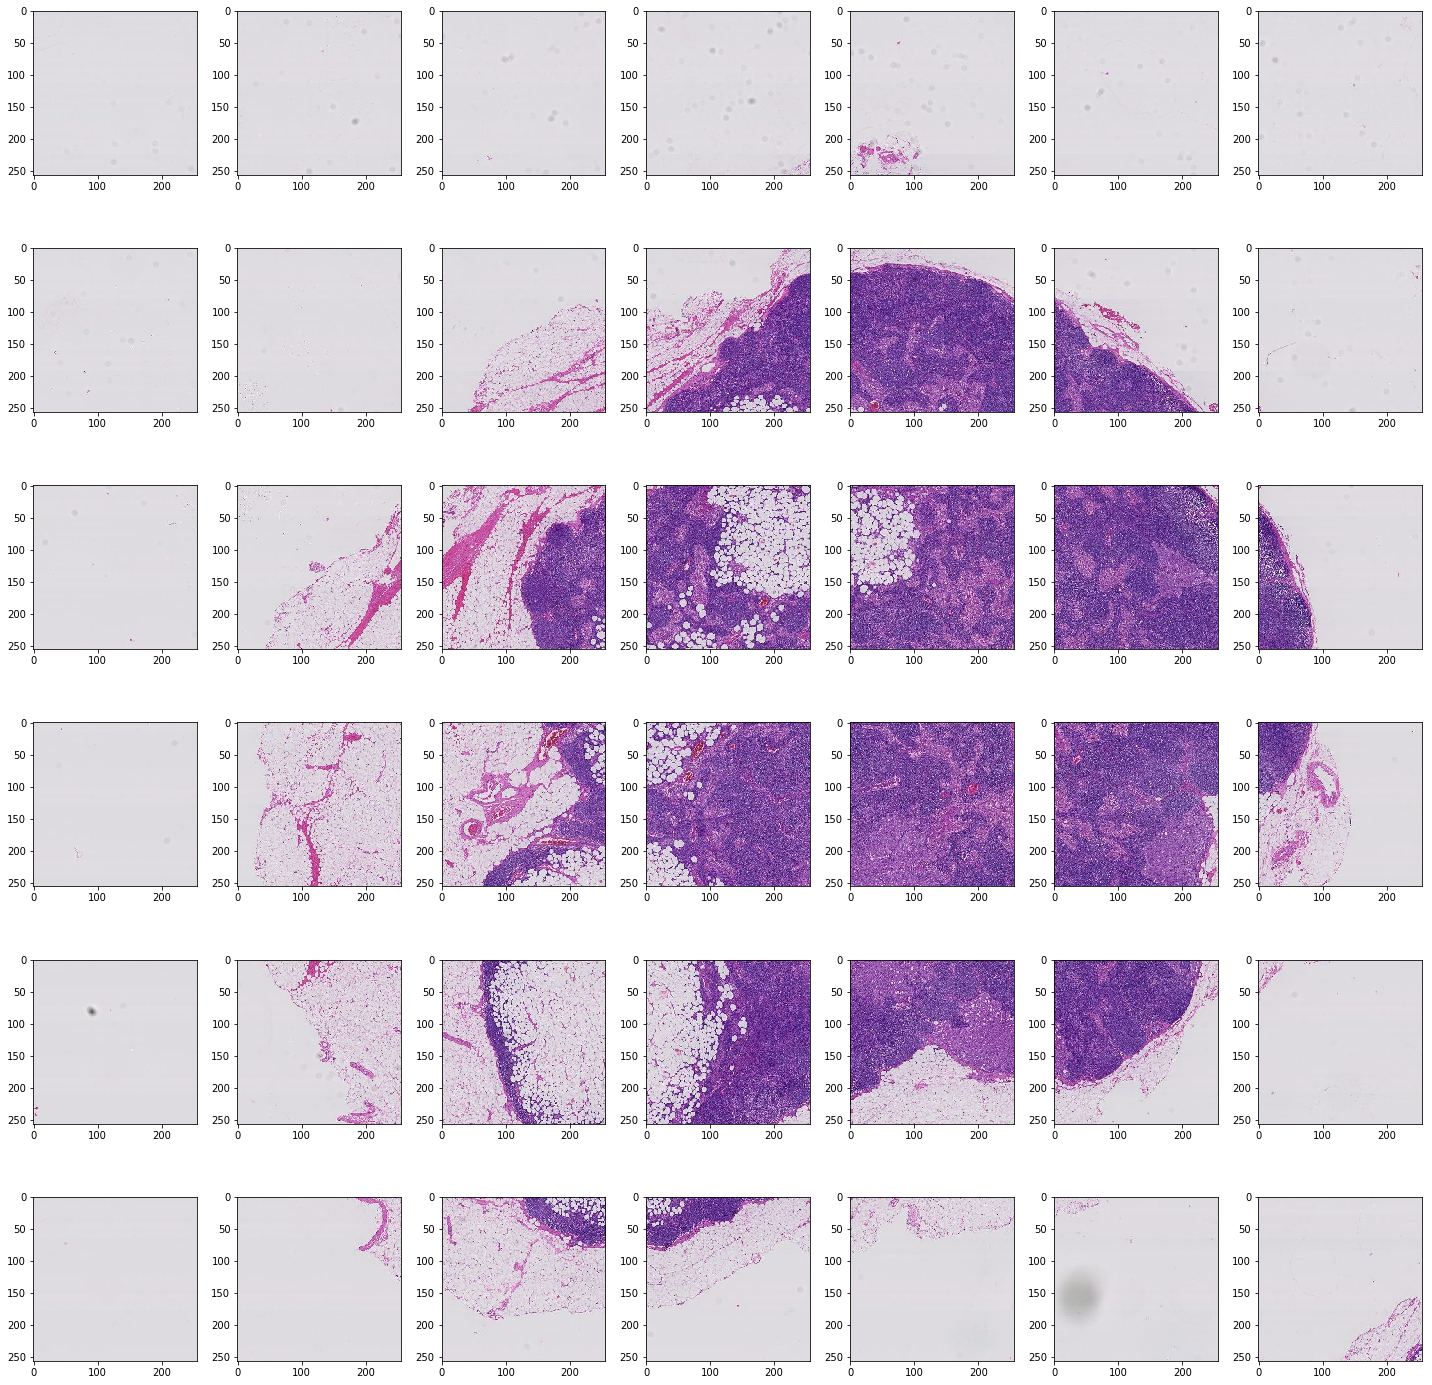

In [13]:
partitions = read_slide_partitions(
    slide,
    5,
    partition_width=256,
    partition_height=256,
    show_plot=True
)

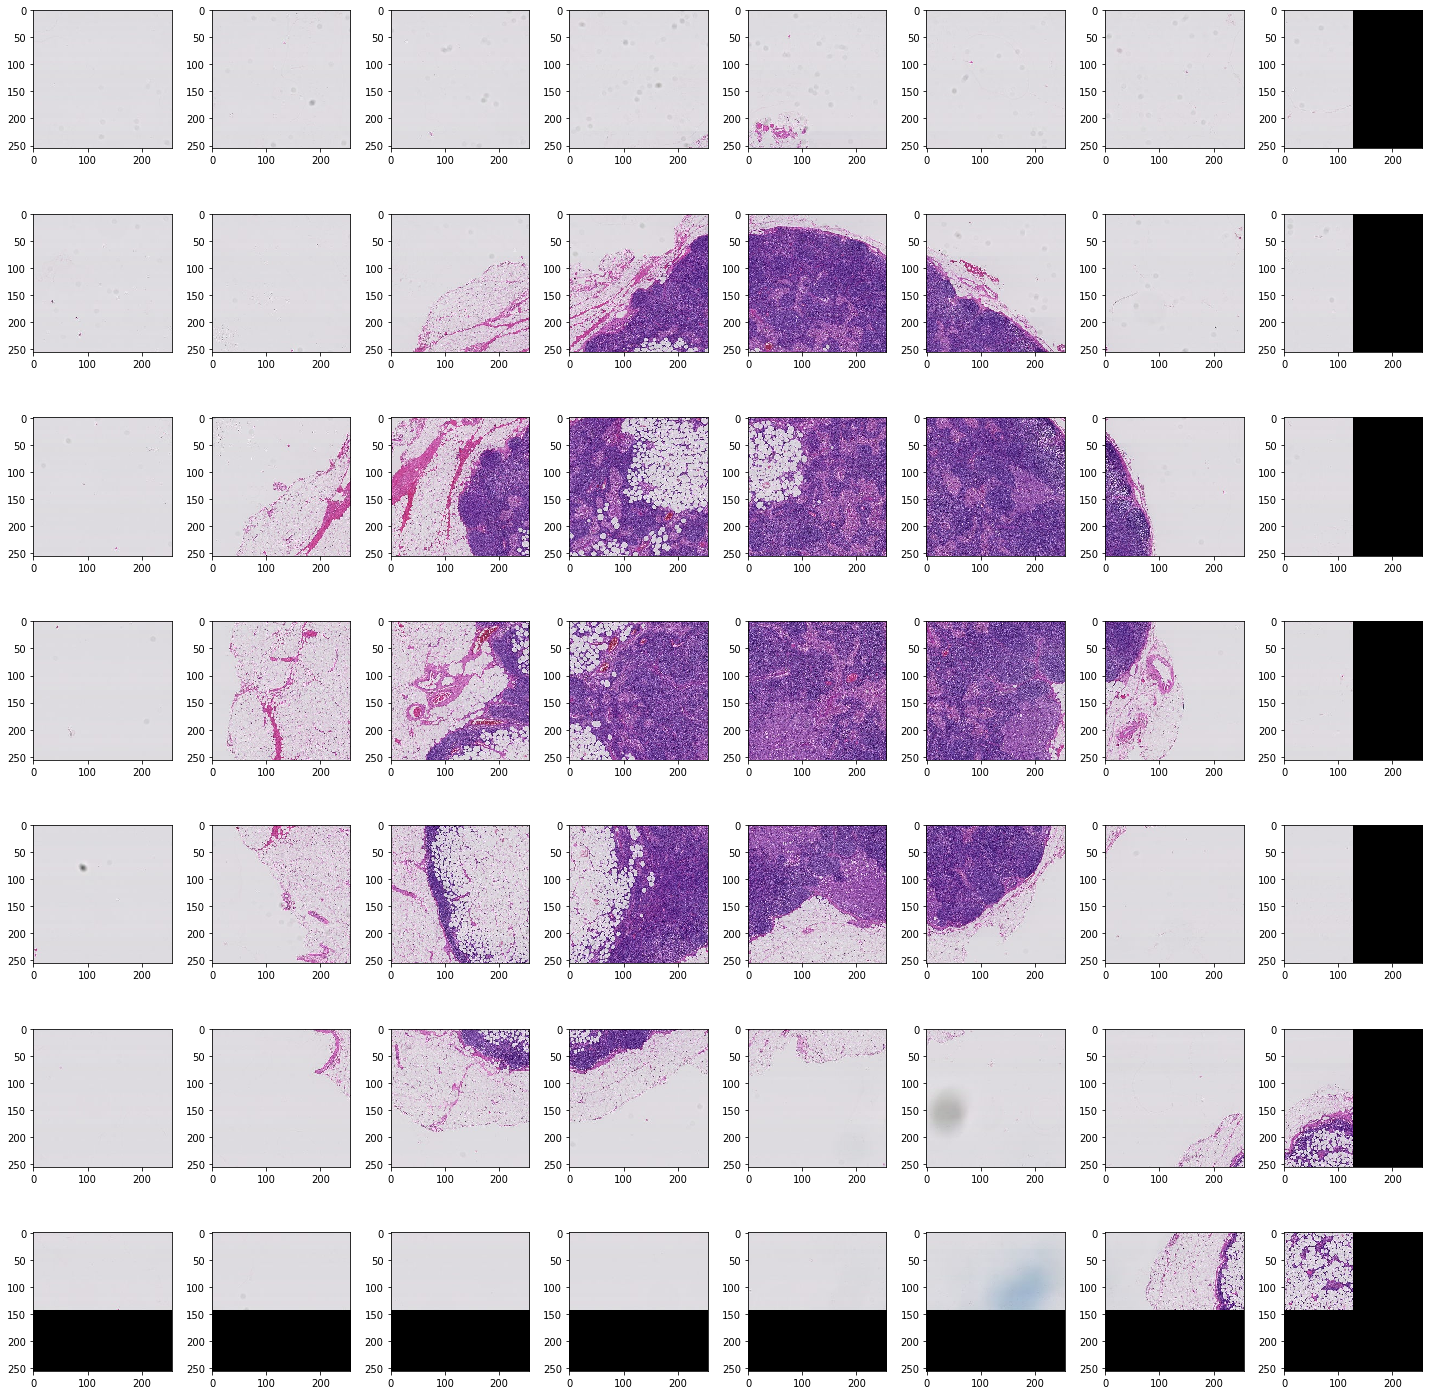

In [14]:
partitions = read_slide_partitions(
    slide,
    5,
    partition_width=256,
    partition_height=256,
    include_padding=True,
    show_plot=True
)